### Example: Isomap on Faces

• One place manifold learning is often used is in understanding the relationship between high-dimensional data points.

• A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.

• Here let's apply Isomap on some faces data. We will use the Labeled Faces in the Wild dataset, which we previously saw in In-Depth: Support Vector Machines and In Depth: Principal Component Analysis.

• We begin with the standard imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

• Running this command will download the data and cache it in your home directory for later use:

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
faces.data.shape

(1348, 2914)

• We have 2,370 images, each with 2,914 pixels.

• In other words, the images can be thought of as data points in a 2,914-dimensional space!

• Let's quickly visualize several of these images to see what we're working with:

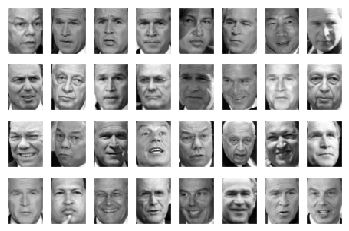

In [3]:
fig, ax = plt.subplots(4, 8, subplot_kw={'xticks' : [], 'yticks' : []})
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray');

• We would like to plot a low-dimensional embedding of the 2,914-dimensional data to learn the fundamental relationships between the images.

• One useful way to start is to compute a PCA, and examine the explained variance ratio, which will give us an idea of how many linear features are required to describe the data:

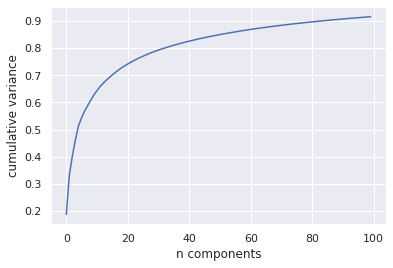

In [4]:
from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

• We see that for this data, nearly 100 components are required to preserve 90% of the variance: this tells us that the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

• When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful.

• We can compute an Isomap embedding on these faces using the same pattern shown before:

In [8]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(1348, 2)

• The output is a two-dimensional projection of all the input images.

• To get a better idea of what the projection tells us, let's define a function that will output image thumbnails at the locations of the projections:

In [23]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                   thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
        
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        show_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - show_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # Don't show points that are too close
                continue
            show_images = np.vstack([show_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i],
                                                                      cmap=cmap), proj[i])
            ax.add_artist(imagebox)

• Calling this function now, we see the result:

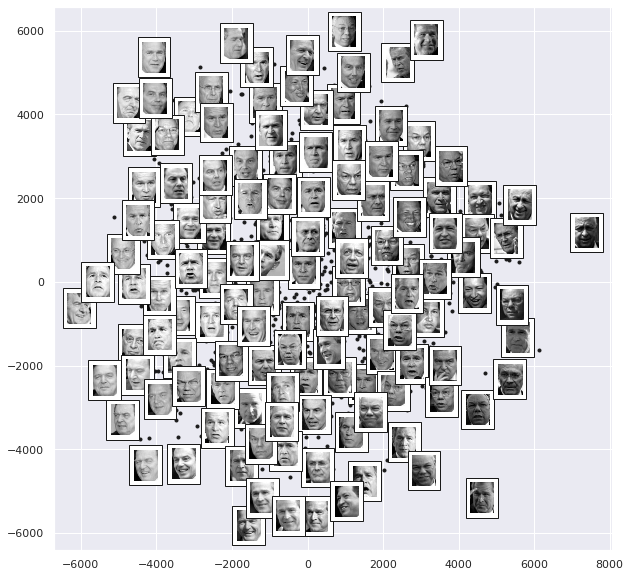

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

• We could then go on to classify this data (perhaps using manifold features as inputs to the classification algorithm) as we did in In-Depth: Support Vector Machines.